# Synthesizing the chronology of late Mesoproterozoic Laurentia tectonics

## Import scientific Python packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.lines as mlines
import matplotlib.patches as patches
import matplotlib
import seaborn as sns
%config InlineBackend.figure_format='retina'

## Import compiled data

In [2]:
dates = pd.read_csv('../data/Mesoproterozoic_Laurentia_dates.csv')
dates.columns

Index(['Sample_No', 'Age', 'Error_Plus', 'Error_Minus', 'Age_Method',
       'Age_Interpretation', 'Age_Note', 'Age_Material', 'Age_Technique',
       'Age_Qualifier', 'Geological_Province', 'Province', 'Latitude',
       'Longitude', 'Location', 'Geological_Info', 'Rock_Type',
       'Rock_Description', 'References', 'Compilation_Source', 'Unnamed: 20',
       'UTM_Zone', 'UTM_Easting', 'UTM_Northing', 'Comment', 'Tectonic_Unit'],
      dtype='object')

## Define legend symbology

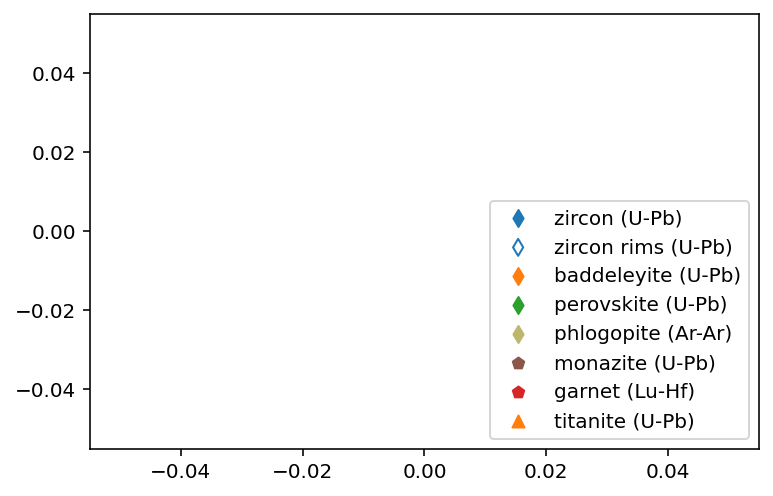

In [3]:
zircon_marker = plt.scatter([], [], c='C0', marker='d', label='zircon (U-Pb)')
zircon_rim_marker = plt.scatter([], [], edgecolors='C0', color='none', marker='d', label='zircon rims (U-Pb)')
bad_marker = plt.scatter([], [], c='C1', marker='d', label='baddeleyite (U-Pb)')
perov_marker = plt.scatter([], [], c='C2', marker='d', label='perovskite (U-Pb)')
phlog_marker = plt.scatter([], [], c='darkkhaki', marker='d', label='phlogopite (Ar-Ar)')
monazite_marker = plt.scatter([], [], marker='p',c='C5',label='monazite (U-Pb)')
garnet_marker = plt.scatter([], [], marker='p',color='C3',label='garnet (Lu-Hf)')
titanite_marker = plt.scatter([], [], marker='^',c='C1',label='titanite (U-Pb)')
plt.legend(handles=[zircon_marker,zircon_rim_marker,bad_marker,perov_marker,phlog_marker,monazite_marker,garnet_marker,titanite_marker],loc=4)
plt.show()

## Implement bootstrap method for duration estimates

In [4]:
def bootstrap_calc_plot(dates,bootstrap_n=10000,kde_bandwidth=0.8,plot=True):

    bootstrapped_mins = []
    bootstrapped_maxs = []

    for i in range(0,bootstrap_n):

        bootstrapped_dates = []

        resampled_data = dates.sample(n=len(dates),replace = True)
        resampled_data.reset_index(inplace=True)

        for n in resampled_data.index:
            bootstrapped_date = np.random.normal(resampled_data.Age[n], resampled_data.Error_Plus[n]/2, 1)
            bootstrapped_dates.append(bootstrapped_date[0])

        bootstrapped_mins.append(np.min(bootstrapped_dates)) 
        bootstrapped_maxs.append(np.max(bootstrapped_dates)) 
        if plot==True:
            if 1000-i > 0:
                sns.kdeplot(bootstrapped_dates,bw_adjust=kde_bandwidth,alpha=0.5,color='C0',shade=False,linewidth=0.1)
    
    if plot==True:
        sns.kdeplot(dates.Age,bw_adjust=kde_bandwidth,color='black')
            
    max_age = np.percentile(bootstrapped_maxs,2.5)
    min_age = np.percentile(bootstrapped_mins,97.5)
    
    return bootstrapped_maxs,bootstrapped_mins,max_age,min_age

def plot_bootstrap_hist(bootstrapped_maxs,bootstrapped_mins,max_age,min_age,age_range_max=1200,age_range_min=1100):
    hist_min = plt.hist(bootstrapped_mins,bins=np.arange(age_range_min,age_range_max,0.5),label='bootstrap min')
    hist_max = plt.hist(bootstrapped_maxs,bins=np.arange(age_range_min,age_range_max,0.5),label='bootstrap max')
    rect = patches.Rectangle((min_age, 0), max_age-min_age, np.max(hist_max[0]), facecolor='lightgrey',zorder=-1,label=
                        'duration estimate')
    plt.gca().add_patch(rect)

## AMCG

In [5]:
AMCG_dates = dates[dates.Geological_Info == 'AMCG']
AMCG_dates = AMCG_dates[AMCG_dates.Age_Interpretation == 'Igneous']
AMCG_dates = AMCG_dates.sort_values('Age',ascending=False)
AMCG_dates.reset_index(inplace=True)

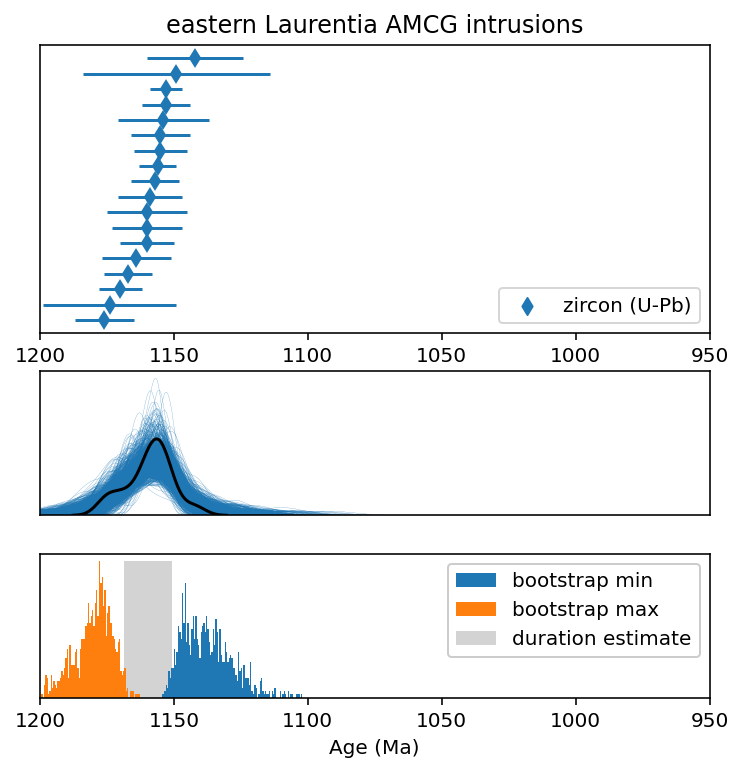

In [6]:
fig = plt.figure(figsize=(6,6))
spec = gridspec.GridSpec(ncols=1, nrows=3,
                         height_ratios=[4, 2, 2])

ax0 = fig.add_subplot(spec[0])
ax0.title.set_text('eastern Laurentia AMCG intrusions')

plt.errorbar(AMCG_dates.Age,
             AMCG_dates.index,
             xerr=AMCG_dates.Error_Plus,
             fmt='d',color='C0',label='zircon crystallization')

ax0.set_yticks([])

plt.legend(handles=[zircon_marker],loc=4)
plt.xlim(1200,950)

ax1 = fig.add_subplot(spec[1])

boot_maxs,boot_mins,AMCG_max,AMCG_min = bootstrap_calc_plot(AMCG_dates,bootstrap_n=1000)
plt.xlim(1200,950)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylabel('')
ax1.set_xlabel('')

ax2 = fig.add_subplot(spec[2])
plot_bootstrap_hist(boot_maxs,boot_mins,AMCG_max,AMCG_min)

plt.legend(framealpha=1)
plt.xlim(1200,950)
ax2.set_yticks([])
plt.xlabel('Age (Ma)')

plt.savefig('geochron_AMCG.png',dpi=300,bbox_inches='tight',pad_inches = 0.1)
plt.show()

In [7]:
AMCG_max = np.percentile(boot_maxs,2.5)
AMCG_min = np.percentile(boot_mins,97.5)

AMCG_max_median = np.median(boot_maxs)
AMCG_min_median = np.median(boot_mins)

print(AMCG_max)
print(AMCG_min)

print(AMCG_max_median)
print(AMCG_min_median)

1168.5607172773612
1150.8388163515708
1178.9987635352136
1138.524350577516


## Midcontinent crystallization dates (preceding Midcontinent Rift)

In [8]:
Abitibi_dates = dates[dates.Geological_Province == 'Midcontinent']
Abitibi_dates = Abitibi_dates.sort_values('Age',ascending=False)
Abitibi_dates.reset_index(inplace=True)

Abitibi_dates_b = Abitibi_dates[Abitibi_dates.Age_Material == 'Baddeleyite']
Abitibi_dates_perov = Abitibi_dates[Abitibi_dates.Age_Material == 'Perovskite']
Abitibi_dates_phlog = Abitibi_dates[Abitibi_dates.Age_Material == 'Phlogopite']

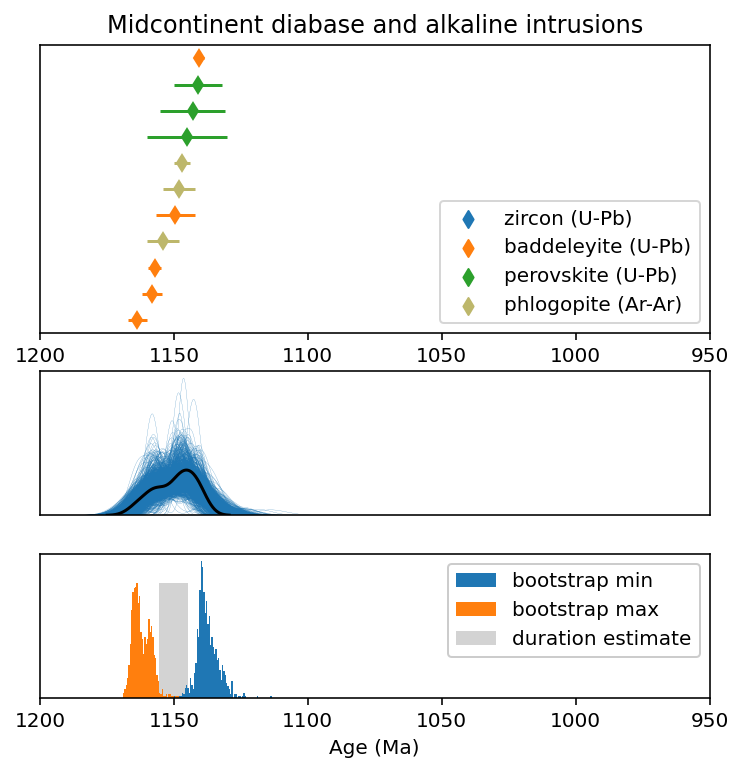

In [9]:
fig = plt.figure(figsize=(6,6))
spec = gridspec.GridSpec(ncols=1, nrows=3,
                         height_ratios=[4, 2, 2])

ax0 = fig.add_subplot(spec[0])
ax0.title.set_text('Midcontinent diabase and alkaline intrusions')

plt.errorbar(Abitibi_dates_b.Age,
             Abitibi_dates_b.index,
             xerr=Abitibi_dates_b.Error_Plus,
             fmt='d',color='C1')

plt.errorbar(Abitibi_dates_perov.Age,
             Abitibi_dates_perov.index,
             xerr=Abitibi_dates_perov.Error_Plus,
             fmt='d',color='C2')

plt.errorbar(Abitibi_dates_phlog.Age,
             Abitibi_dates_phlog.index,
             xerr=Abitibi_dates_phlog.Error_Plus,
             fmt='d',color='darkkhaki')

plt.gca().set_yticks([])
#plt.gca().set_xticks([])
plt.legend(handles=[zircon_marker,bad_marker,perov_marker,phlog_marker],loc=4)
plt.xlim(1200,950)

fig.add_subplot(spec[1])

boot_maxs,boot_mins,Abitibi_max,Abitibi_min = bootstrap_calc_plot(Abitibi_dates,bootstrap_n=1000)
plt.xlim(1200,950)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')

ax2 = fig.add_subplot(spec[2])
plot_bootstrap_hist(boot_maxs,boot_mins,Abitibi_max,Abitibi_min)

plt.legend(framealpha=1)
plt.xlim(1200,950)
ax2.set_yticks([])
plt.xlabel('Age (Ma)')

plt.savefig('geochron_Abitibi_Alkaline.png',dpi=300,bbox_inches='tight',pad_inches = 0.1)
plt.show()

In [10]:
Abitibi_max = np.percentile(boot_maxs,2.5)
Abitibi_min = np.percentile(boot_mins,97.5)

Abitibi_max_median = np.median(boot_maxs)
Abitibi_min_median = np.median(boot_mins)

print(Abitibi_max)
print(Abitibi_min)

print(Abitibi_max_median)
print(Abitibi_min_median)

1155.6162513287522
1144.8027555642711
1162.7594840664046
1138.2297647292862


## Midcontinent Rift magmatic activity

In [11]:
MCR_dates = dates[dates.Geological_Province == 'Midcontinent Rift']
MCR_dates = MCR_dates.sort_values('Age',ascending=False)
MCR_dates.reset_index(inplace=True)

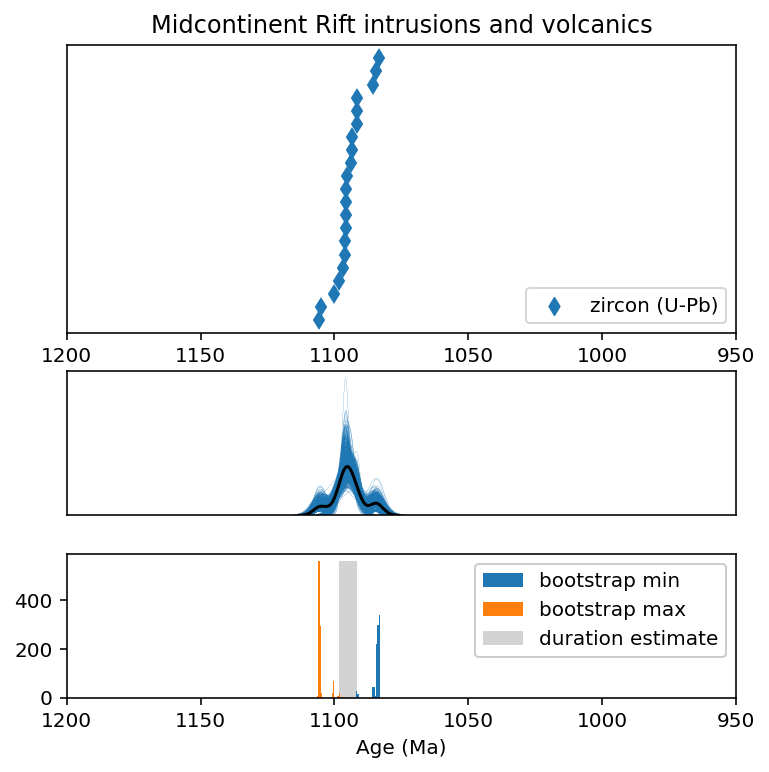

In [12]:
fig = plt.figure(figsize=(6,6))
spec = gridspec.GridSpec(ncols=1, nrows=3,
                         height_ratios=[4, 2, 2])

ax0 = fig.add_subplot(spec[0])
ax0.title.set_text('Midcontinent Rift intrusions and volcanics')

plt.errorbar(MCR_dates.Age,
             MCR_dates.index,
             xerr=MCR_dates.Error_Plus,
             fmt='d',color='C0',label='zircon crystallization')

plt.gca().set_yticks([])
#plt.gca().set_xticks([])
plt.legend(handles=[zircon_marker],loc=4)
plt.xlim(1200,950)

fig.add_subplot(spec[1])

boot_maxs,boot_mins,MCR_max,MCR_min = bootstrap_calc_plot(MCR_dates,bootstrap_n=1000)
plt.xlim(1200,950)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')

fig.add_subplot(spec[2])
plot_bootstrap_hist(boot_maxs,boot_mins,MCR_max,MCR_min,age_range_max=1150,age_range_min=1050)

plt.legend(framealpha=1)
plt.xlim(1200,950)
plt.gca().set_ylabel('')
plt.xlabel('Age (Ma)')

plt.savefig('geochron_MCR.png',dpi=300,bbox_inches='tight',pad_inches = 0.1)
plt.show()

In [13]:
MCR_max = np.percentile(boot_maxs,2.5)
MCR_min = np.percentile(boot_mins,97.5)

MCR_max_median = np.median(boot_maxs)
MCR_min_median = np.median(boot_mins)

print(MCR_max)
print(MCR_min)

print(MCR_max_median)
print(MCR_min_median)

1098.4848846189846
1091.5210851733414
1105.5518568691423
1083.5725236548456


## Blue Ridge metamorphism dates

Metamorphic dates from the Blue Ridge are compiled using the same headers as the GSC Knowledgebase

In [14]:
Blue_Ridge_dates = dates[dates.Geological_Province == 'Blue Ridge']
Blue_Ridge_dates = Blue_Ridge_dates.sort_values('Age',ascending=False)
Blue_Ridge_dates.reset_index(inplace=True)
Blue_Ridge_dates.tail(1)

,index,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,...,Rock_Type,Rock_Description,References,Compilation_Source,Unnamed: 20,UTM_Zone,UTM_Easting,UTM_Northing,Comment,Tectonic_Unit
52,2,MR-10-132,906.0,46.0,NaN,NaN,Metamorphic,TW3d,titanite,SHRIMP,...,NaN,Ybqm biotite meta-quartz monzonite,NaN,compiled by NSH,Tollo2017a,NaN,NaN,NaN,NaN,NaN


In [15]:
Blue_Ridge_dates_Shaw = Blue_Ridge_dates[Blue_Ridge_dates.Age>1120]
Blue_Ridge_dates_Gren = Blue_Ridge_dates[Blue_Ridge_dates.Age<1120]

In [16]:
Blue_Ridge_dates_z = Blue_Ridge_dates[Blue_Ridge_dates.Age_Material == 'zircon']
Blue_Ridge_dates_t = Blue_Ridge_dates[Blue_Ridge_dates.Age_Material == 'titanite']
Blue_Ridge_dates_g = Blue_Ridge_dates[Blue_Ridge_dates.Age_Material == 'garnet']
Blue_Ridge_dates_m = Blue_Ridge_dates[Blue_Ridge_dates.Age_Material == 'monazite']

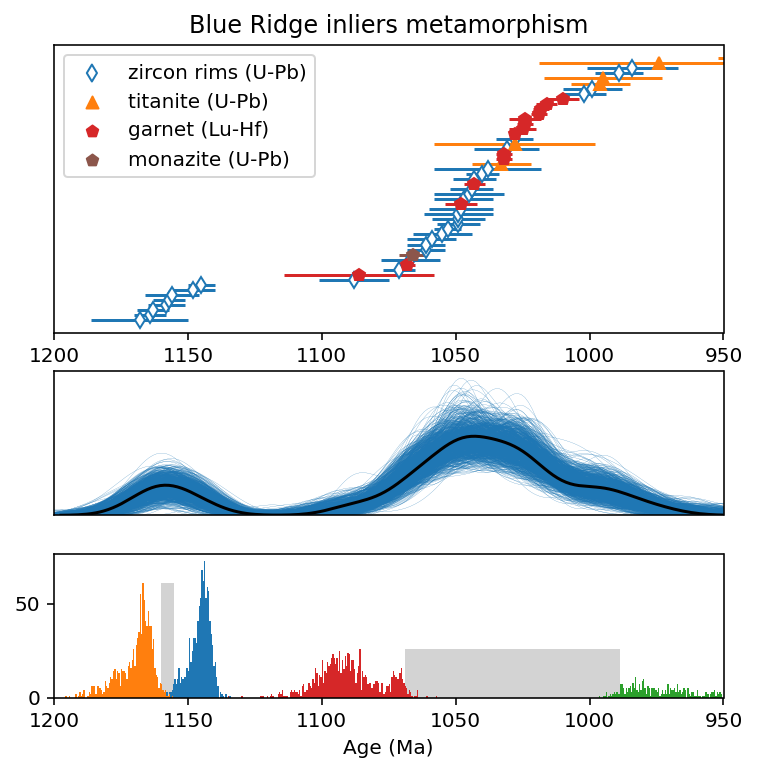

In [17]:
fig = plt.figure(figsize=(6,6))
spec = gridspec.GridSpec(ncols=1, nrows=3,
                         height_ratios=[4, 2, 2])


ax0 = fig.add_subplot(spec[0])
ax0.title.set_text('Blue Ridge inliers metamorphism')

plt.errorbar(Blue_Ridge_dates_z.Age,
             Blue_Ridge_dates_z.index,
             xerr=Blue_Ridge_dates_z.Error_Plus,
             fmt='d',color='C0',mfc='white',label='zircon rims')

plt.errorbar(Blue_Ridge_dates_t.Age,
             Blue_Ridge_dates_t.index,
             xerr=Blue_Ridge_dates_t.Error_Plus,
             fmt='^',color='C1',label='titanite')

plt.errorbar(Blue_Ridge_dates_g.Age,
             Blue_Ridge_dates_g.index,
             xerr=Blue_Ridge_dates_g.Error_Plus,
             fmt='p',color='C3',label='garnet (Lu-Hf)')

plt.errorbar(Blue_Ridge_dates_m.Age,
             Blue_Ridge_dates_m.index,
             xerr=Blue_Ridge_dates_m.Error_Plus,
             fmt='p',color='C5',label='monazite')

plt.xlim(1200,950)
plt.gca().set_yticks([])
plt.legend(handles=[zircon_rim_marker,titanite_marker,garnet_marker,monazite_marker],loc=2)

fig.add_subplot(spec[1])
boot_maxs,boot_mins,Blue_Ridge_max,Blue_Ridge_min = bootstrap_calc_plot(Blue_Ridge_dates,bootstrap_n=1000,kde_bandwidth=0.4)


boot_maxs,boot_mins,Blue_Ridge_Gren_max,Blue_Ridgee_Gren_min = bootstrap_calc_plot(Blue_Ridge_dates_Gren,bootstrap_n=1000,kde_bandwidth=0.8,plot=False)

plt.xlim(1200,950)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().set_ylabel('')
plt.gca().set_xlabel('')

fig.add_subplot(spec[2])
boot_maxs,boot_mins,Blue_Ridge_Shaw_max,Blue_Ridge_Shaw_min = bootstrap_calc_plot(Blue_Ridge_dates_Shaw,bootstrap_n=1000,kde_bandwidth=0.8,plot=False)
plot_bootstrap_hist(boot_maxs,boot_mins,Blue_Ridge_Shaw_max,Blue_Ridge_Shaw_min,age_range_max=1200,age_range_min=950)
boot_maxs,boot_mins,Blue_Ridge_Gren_max,Blue_Ridge_Gren_min = bootstrap_calc_plot(Blue_Ridge_dates_Gren,bootstrap_n=1000,kde_bandwidth=0.8,plot=False)
plot_bootstrap_hist(boot_maxs,boot_mins,Blue_Ridge_Gren_max,Blue_Ridge_Gren_min,age_range_max=1200,age_range_min=950)
#plt.legend(framealpha=1,bbox_to_anchor=(1.4,1))
plt.xlim(1200,950)
plt.xlabel('Age (Ma)')

plt.savefig('geochron_Blue_Ridge.png',dpi=300,bbox_inches='tight',pad_inches = 0.1)
plt.show()

In [18]:
Blue_Ridge_Gren_max_median = np.median(boot_maxs)
Blue_Ridge_Gren_min_median = np.median(boot_mins)

print(Blue_Ridge_Shaw_max)
print(Blue_Ridge_Shaw_min)
print('')
print(Blue_Ridge_Gren_max)
print(Blue_Ridge_Gren_min)
print('')
print(Blue_Ridge_Gren_max_median)
print(Blue_Ridge_Gren_min_median)

1160.030151301662
1155.249454552395

1068.810834917534
988.4880434029538

1090.8612708812298
916.7987244616018


## Grenville metamorphism

In [1]:
Grenville_Province_dates = dates[dates.Geological_Province == 'Grenville Province']
Grenville_Province_dates = Grenville_Province_dates.sort_values('Age',ascending=False)
Grenville_Province_dates.reset_index(inplace=True)
len(Grenville_Province_dates)

NameError: name 'dates' is not defined

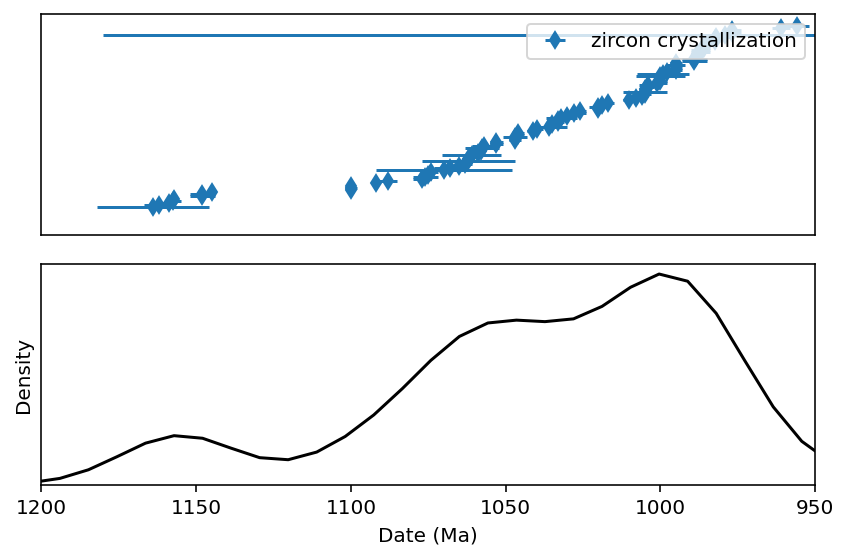

In [20]:
fig = plt.figure(figsize=(6,4))
spec = gridspec.GridSpec(ncols=1, nrows=2,
                         height_ratios=[2, 2])

fig.add_subplot(spec[0])

plt.errorbar(Grenville_Province_dates.Age,
             Grenville_Province_dates.index,
             xerr=Grenville_Province_dates.Error_Plus,
             fmt='d',color='C0',label='zircon crystallization')
plt.xlim(1200,950)
plt.gca().set_yticks([])
plt.gca().set_xticks([])
plt.legend(loc=1)

fig.add_subplot(spec[1])

sns.kdeplot(Grenville_Province_dates.Age,bw_adjust=0.2,color='black')
plt.xlim(1200,950)

plt.gca().set_yticks([])
plt.xlabel('Date (Ma)')

plt.tight_layout()
plt.show()

In [21]:
import matplotlib.image as mpimg

geochron_Blue_Ridge_img = mpimg.imread('geochron_Blue_Ridge.png')
geochron_AMCG_img = mpimg.imread('geochron_AMCG.png')
geochron_Abitibi_img = mpimg.imread('geochron_Abitibi_Alkaline.png')
geochron_MCR_img = mpimg.imread('geochron_MCR.png')


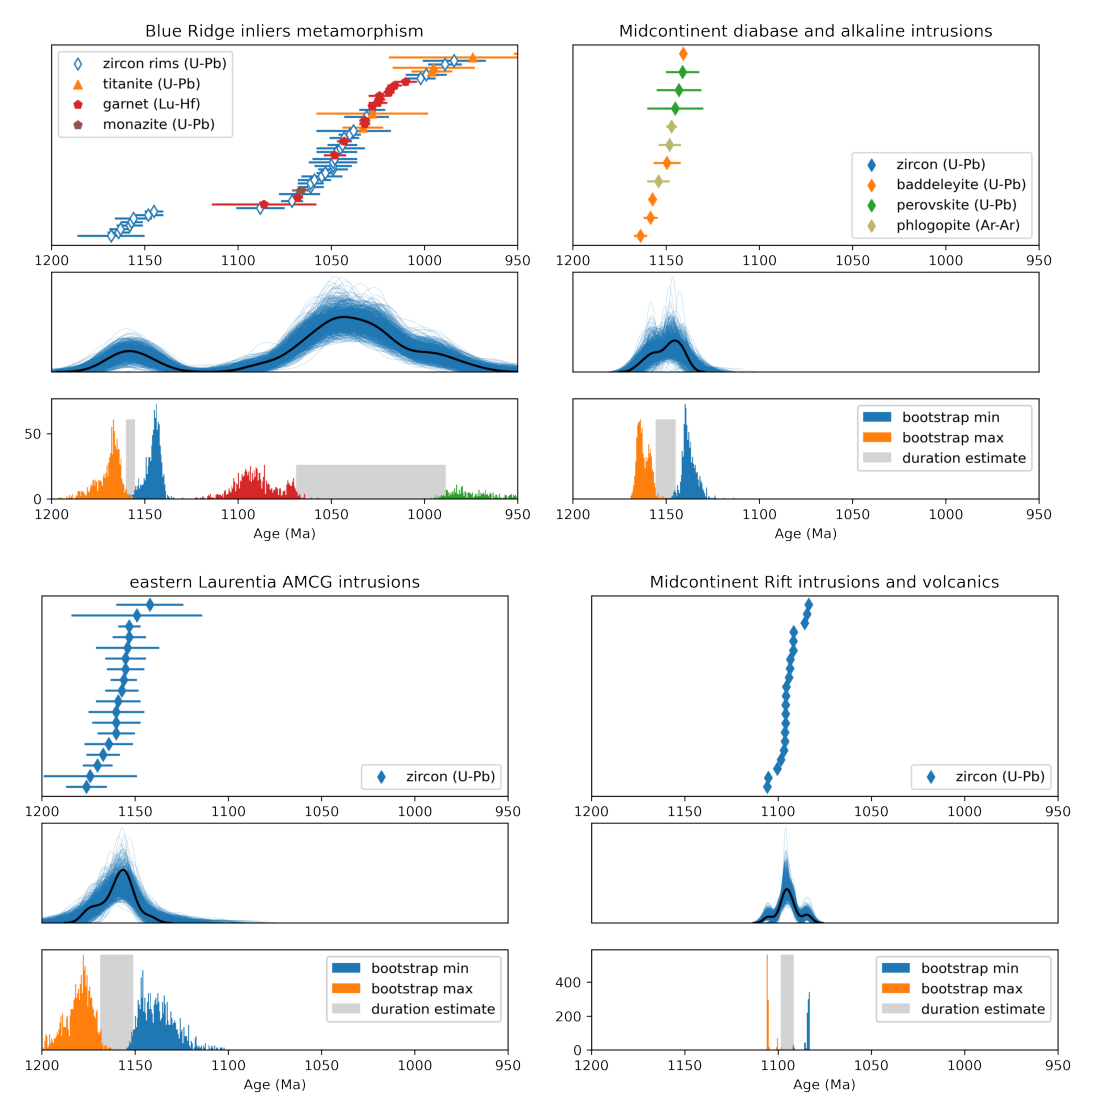

In [30]:
from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 2),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, [geochron_Blue_Ridge_img,
                         geochron_Abitibi_img,
                         geochron_AMCG_img,
                         geochron_MCR_img]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.axis("off")


plt.subplots_adjust(wspace=-5, hspace=-5)

plt.savefig('geochron_figure.png',dpi=300)
plt.show()

In [23]:
Abitibi_min - Abitibi_max

-10.813495764481104

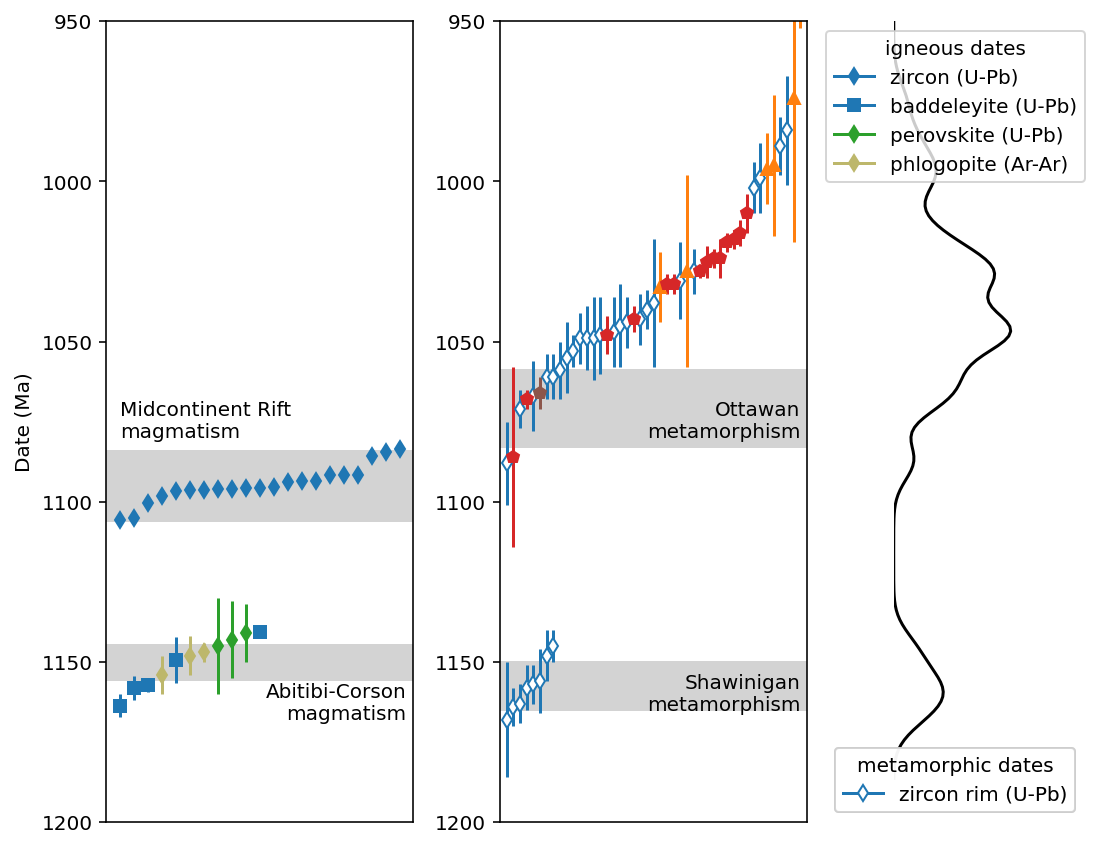

In [24]:
fig = plt.figure(figsize=(10,6))
spec = gridspec.GridSpec(ncols=4, nrows=1,
                         width_ratios=[1, 1, 0.4, 1])

#Midcontinent
fig.add_subplot(spec[0])

plt.errorbar(MCR_dates.index,
             MCR_dates.Age,
             yerr=MCR_dates.Error_Plus,
             fmt='d',color='C0')

plt.errorbar(Abitibi_dates_b.index,
             Abitibi_dates_b.Age,
             yerr=Abitibi_dates_b.Error_Plus,
             fmt='s',color='C0')

plt.errorbar(Abitibi_dates_perov.index,
             Abitibi_dates_perov.Age,
             yerr=Abitibi_dates_perov.Error_Plus,
             fmt='d',color='C2')

plt.errorbar(Abitibi_dates_phlog.index,
             Abitibi_dates_phlog.Age,
             yerr=Abitibi_dates_phlog.Error_Plus,
             fmt='d',color='darkkhaki')

rectangle = matplotlib.patches.Rectangle((-1, 1106),len(MCR_dates.index)+1, -22, color='lightgrey')
plt.gca().add_patch(rectangle)
plt.text(0,1080,'Midcontinent Rift\nmagmatism')

rectangle = matplotlib.patches.Rectangle((-1, Abitibi_max),len(MCR_dates.index)+1, Abitibi_min - Abitibi_max, color='lightgrey')
plt.gca().add_patch(rectangle)
plt.text(20.5,1168,'Abitibi-Corson\nmagmatism',horizontalalignment='right')

plt.ylim(1200,950)
plt.xlim(-1,len(MCR_dates.index))
plt.gca().set_xticks([])
plt.ylabel('Date (Ma)')

fig.add_subplot(spec[1])

plt.errorbar(Blue_Ridge_dates_z.index[0:8],
             Blue_Ridge_dates_z.Age[0:8],
             yerr=Blue_Ridge_dates_z.Error_Plus[0:8],
             fmt='d',color='C0', markerfacecolor='white',label='zircon rims')

plt.errorbar(Blue_Ridge_dates_z.index[8:]-8,
             Blue_Ridge_dates_z.Age[8:],
             yerr=Blue_Ridge_dates_z.Error_Plus[8:],
             fmt='d',color='C0', markerfacecolor='white',label='zircon rims')

plt.errorbar(Blue_Ridge_dates_t.index-8,
             Blue_Ridge_dates_t.Age,
             yerr=Blue_Ridge_dates_t.Error_Plus,
             fmt='^',color='C1',label='titanite')

plt.errorbar(Blue_Ridge_dates_g.index-8,
             Blue_Ridge_dates_g.Age,
             yerr=Blue_Ridge_dates_g.Error_Plus,
             fmt='p',color='C3',label='garnet (Lu-Hf)')

plt.errorbar(Blue_Ridge_dates_m.index-8,
             Blue_Ridge_dates_m.Age,
             yerr=Blue_Ridge_dates_m.Error_Plus,
             fmt='p',color='C5',label='monazite')

rectangle = matplotlib.patches.Rectangle((-1, 1083),len(Blue_Ridge_dates.index)+1, -24, color='lightgrey')
plt.gca().add_patch(rectangle)
plt.text(44,1080,'Ottawan\nmetamorphism',horizontalalignment='right')

rectangle = matplotlib.patches.Rectangle((-1, 1165),len(Blue_Ridge_dates.index)+1, -15, color='lightgrey')
plt.gca().add_patch(rectangle)
plt.text(44,1165,'Shawinigan\nmetamorphism',horizontalalignment='right')

plt.ylim(1200,950)
plt.xlim(-1,len(Blue_Ridge_dates.index)-8)
plt.gca().set_xticks([])




fig.add_subplot(spec[2])

sns.kdeplot(y=Blue_Ridge_dates.Age,bw_adjust=0.25,color='black')
plt.ylim(1200,950)

plt.gca().axis('off')
zircon_marker = plt.errorbar([], [], c='C0', marker='d', label='zircon (U-Pb)')
zircon_rim_marker = plt.errorbar([], [], c='C0', marker='d', markerfacecolor='white', label='zircon rim (U-Pb)')
bad_marker = plt.errorbar([], [], c='C0', marker='s', label='baddeleyite (U-Pb)')
perov_marker = plt.errorbar([], [], c='C2', marker='d', label='perovskite (U-Pb)')
phlog_marker = plt.errorbar([], [], c='darkkhaki', marker='d', label='phlogopite (Ar-Ar)')
legend_ig = plt.legend(handles=[zircon_marker,
                    bad_marker,
                    perov_marker,
                    phlog_marker],loc= 'upper center',title='igneous dates')
legend_meta = plt.legend(handles=[zircon_rim_marker],
                         loc= 'lower center',title='metamorphic dates')
plt.gca().add_artist(legend_ig)
plt.gca().add_artist(legend_meta)

plt.tight_layout()
plt.show()

## Import the Canadian Geochronology Knowledgebase

The CGKB compilation represents publicly available geochronological information for  Canada. The data is compiled from federal, provincial and territorial government publications and reports, university theses, books and journal articles.

https://www.nrcan.gc.ca/maps-tools-publications/tools/geodetic-reference-systems/canadian-geochronology-knowledgebase/18211

In [25]:
GSC_data = pd.read_csv('../data/GSC_compilation/Geochron_en.txt',sep='\t')
GSC_data.head(1)

,Age_No,Lab_No,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,...,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References,LastUpdated
0,16505,2808,Missi 5,1881.0,8.0,8.0,Pb-evap,Detrital,"Fraction 3, age is 207Pb/206Pb age. U-not meas...",Zircon,...,Churchill/Trans-Hudson Orogen,MB,54.76676,-101.83372,"Flin Flon, E. of Ross Lake","Flin Flon Domain - Little Cliff Member, Missi ...",Sedimentary,pebbly sandstone,"Ansdell, K.M., Kyser, T.K., Stauffer, M.R. and...",2005-02-22 21:47:51


In [26]:
GSC_data_meta = GSC_data[(GSC_data.Age_Interpretation == 'Peak Metamorphic') | (GSC_data.Age_Interpretation == 'Metamorphic')]
GSC_data_ign = GSC_data[(GSC_data.Age_Interpretation == 'Igneous Crystallization')]
GSC_data_meta_Grenville = GSC_data_meta[GSC_data_meta.Geological_Province == 'Grenville Province']
GSC_data_meta_Grenville.head(1)

,Age_No,Lab_No,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,...,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References,LastUpdated
2021,14627,-9328,CG97-301,975.5,5.1,5.1,U/Pb,Metamorphic,Only one titanite analysis,Titanite,...,Grenville Province,NL,51.04865,-56.76933,"Tectonic inlier, N of northern end of Long Ran...",Grenville Inlier withe the Paleozoic platform ...,Plutonic,"Pink- to grey- weathering, medium-grained, rec...","Heaman, L.M., Gower, C.F. and Perrault, S., 20...",2004-01-01 12:00:00


In [27]:
Grenville_monazite = GSC_data_meta[(GSC_data_meta.Geological_Province == 'Grenville Province') & 
                                   (GSC_data_meta.Age_Material == 'Monazite') &  
                                    (GSC_data_meta.Error_Plus != 0) &  
                                    (GSC_data_meta.Error_Plus < 20)]

Grenville_monazite = Grenville_monazite[Grenville_monazite.Age_Note != 'Grey-literature: information and age quality to be verified by user']
Grenville_monazite = Grenville_monazite.sort_values('Age')
Grenville_monazite.reset_index(inplace=True)
Grenville_monazite.to_csv('../data/GSC_compilation/GSC_data_meta_Grenville_monazite.csv')

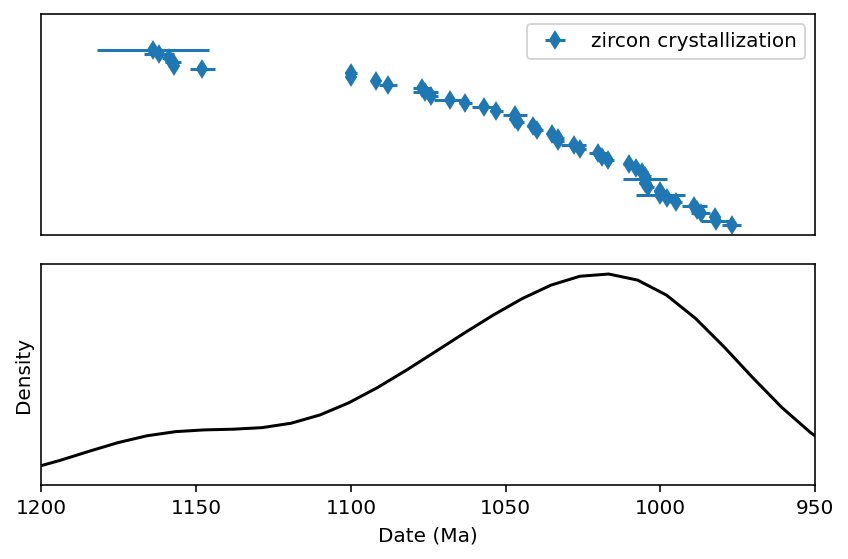

In [28]:
fig = plt.figure(figsize=(6,4))
spec = gridspec.GridSpec(ncols=1, nrows=2,
                         height_ratios=[2, 2])

fig.add_subplot(spec[0])

plt.errorbar(Grenville_monazite.Age,
             Grenville_monazite.index,
             xerr=Grenville_monazite.Error_Plus,
             fmt='d',color='C0',label='zircon crystallization')
plt.xlim(1200,950)
plt.gca().set_yticks([])
plt.gca().set_xticks([])
plt.legend(loc=1)

fig.add_subplot(spec[1])

sns.kdeplot(Grenville_monazite.Age,bw_adjust=0.2,color='black')
plt.xlim(1200,950)

plt.gca().set_yticks([])
plt.xlabel('Date (Ma)')

plt.tight_layout()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'U_Pb_sample_mean'

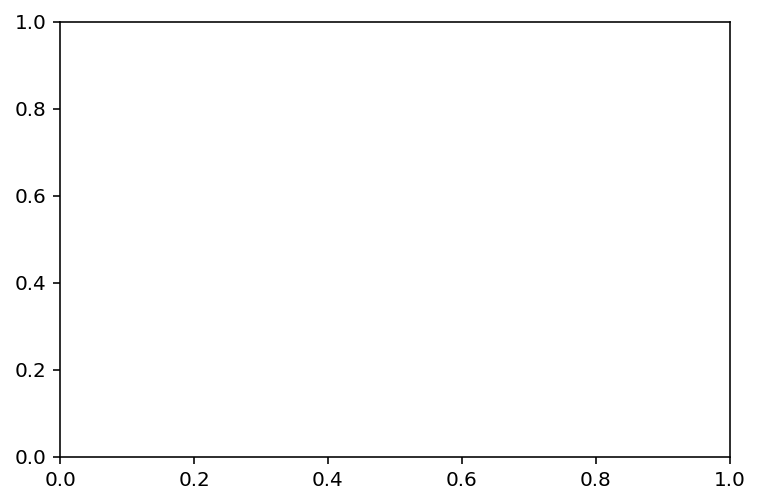

In [29]:
fig, ax = plt.subplots()
sns.kdeplot(MCR_dates.U_Pb_sample_mean,bw_adjust=1,color='tomato',ax=ax,label='Midcontinent Rift magmatism')
ax.set_yticks([])
plt.xlabel('Date (Ma)')
plt.legend(loc='upper left',bbox_to_anchor=[0,1.12])

ax2 = ax.twinx()
sns.kdeplot(Grenville_dates.Date,bw_adjust=0.3,color='C0',ax=ax2,label='Blue Ridge metamorphism')
ax2.set_yticks([])
plt.legend(loc='upper left',bbox_to_anchor=[0,1.2])
plt.ylabel('')
plt.xlabel('')
plt.xlim(1200,950)
plt.show()

In [ ]:
bootstrapped_dates

In [ ]:
Grenville_dates.Date

In [ ]:
def weighted_mean(dates,sigma):
    
    """
    calculated a weighted mean from dates and uncertainities
    
    input parameters
    ----------------
    dates: date of individual grains
    sigma: 1 sigma uncertainty associated with dates
    
    returns
    ----------------
    weighted_mean, 2 sigma uncertainty
    
    """
    
    inverse_variance=[]
    alpha=[]
    weighted_mean_calc=[]
    
    for n in range(0,len(dates)):
        value = 1/sigma[n]**2
        inverse_variance.append(value)
    inverse_variance_sum = np.sum(inverse_variance)
    
    for n in range(0,len(dates)):
        value = (1/sigma[n]**2)/inverse_variance_sum
        alpha.append(value)
        
    #calculate the weights for each date
    for n in range(0,len(dates)):
        value = alpha[n]*dates[n]
        weighted_mean_calc.append(value)
    
    #take the sum of the weights multiplied by the dates to get the weighted
    #mean (equation 64 of McLean et al., 2011)
    weighted_mean = np.sum(weighted_mean_calc)
    
    #the variance of the weighted mean is simply the inverse of the sum of
    #the inverse variances of each date (equation 66 of McLean et al., 2011)
    variance = 1/inverse_variance_sum
    
    weighted_mean_sigma = np.sqrt(variance)
    
    n = len(dates)
    
    print('The weighted mean is:')

    print(weighted_mean)

    print('With a 2sigma error of:')

    print(2*weighted_mean_sigma)
    
    print('N=' )
    print(n)
    
    return weighted_mean, 2*weighted_mean_sigma

Data from **Constraints on the timing and duration of orogenic events by combined Lu–Hf and Sm–Nd geochronology: An example from the Grenville orogeny**

Errors are 1$\sigma$

In [ ]:
J2018_z = pd.read_csv('../data/Johnson2018/Johnson2018_zircon.csv')
J2018_z_rim = J2018_z[J2018_z.rim_core=='rim']
J2018_z_rim_BV10 = J2018_z_rim[J2018_z_rim['sample_ID']=='BV10']
J2018_z_rim_S09 = J2018_z_rim[J2018_z_rim['sample_ID']=='S09']
J2018_z_rim_S10 = J2018_z_rim[J2018_z_rim['sample_ID']=='S10']
J2018_z_rim_ST10 = J2018_z_rim[J2018_z_rim['sample_ID']=='ST10']

In [ ]:
J2018_z_rim_BV10

In [ ]:
weighted_mean(J2018_z_rim_BV10['207Pb_206Pb_date'].tolist(),J2018_z_rim_BV10['207Pb_206Pb_date_err'].tolist())

In [ ]:
J2018_z_rim_S09

In [ ]:
weighted_mean(J2018_z_rim_S09['207Pb_206Pb_date'].tolist(),J2018_z_rim_S09['207Pb_206Pb_date_err'].tolist())

In [ ]:
J2018_z_rim_S10

In [ ]:
weighted_mean(J2018_z_rim_S10['207Pb_206Pb_date'].tolist(),J2018_z_rim_S10['207Pb_206Pb_date_err'].tolist())

In [ ]:
J2018_z_rim_ST10

In [ ]:
sns.histplot(J2018_z_rim['207Pb_206Pb_date'],bins=np.arange(800,1300,10))
plt.xlim(1250,950)
plt.xlabel('Date (Ma)')
plt.show()

In [ ]:
file_150 = '../data/Williams2019/16TG150-Elephant-Rock-Monazite-Composition-reformat.xlsx'
file_151 = '../data/Williams2019/16Tg151-Treadway-Mountain-Monzite-Composition-Reformat.xlsx'
file_153 = '../data/Williams2019/16TG153-Dixon-schist-Monazite Composition-reformat.xlsx'
file_154 = '../data/Williams2019/16TG154-Swede-Pond-Monazite-Composition-reformat.xlsx'

M2019_150 = pd.read_excel(file_150,header=2,nrows=24)
M2019_151 = pd.read_excel(file_151,header=2,nrows=37)
M2019_153 = pd.read_excel(file_153,header=2,nrows=14)
M2019_154 = pd.read_excel(file_154,header=3,nrows=37)

M2019_dates = M2019_150.Date.tolist() + M2019_151.Date.tolist() + M2019_153.Date.tolist() + M2019_154.Date.tolist()

In [ ]:
sns.histplot(M2019_dates,bins=50)
plt.xlim(1250,950)
plt.xlabel('Date (Ma)')
plt.show()

In [ ]:
sns.kdeplot(M2019_dates,bw_adjust=0.4)
plt.xlim(1250,950)
plt.xlabel('Date (Ma)')
plt.show()

In [ ]:
GSC_data.Age_Interpretation.unique()

In [ ]:
plt.hist(GSC_data_meta.Age,bins=400)
plt.xlim(2000,0)
plt.title('Metamorphic dates within GSC Knowledgebase')
plt.xlabel('Age (Ma)')
plt.ylabel('n')
plt.show()

In [ ]:
plt.subplot(2,1,1)
plt.hist(GSC_data_ign.Age,bins=100)
plt.xlim(2000,0)
plt.xlabel('Age (Ma)')
plt.subplot(2,1,2)
plt.hist(GSC_data_meta.Age,bins=100)
plt.xlim(2000,0)
plt.show()

Grenville Province data from GSC compilation



In [ ]:
plt.hist(GSC_data_meta_Grenville_monazite.Age,bins=400)
plt.xlim(1250,900)
plt.title('Metamorphic dates within GSC Knowledgebase')
plt.xlabel('Age (Ma)')
plt.ylabel('n')
plt.show()

In [ ]:
12